In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
def theta0(theta: float) -> np.ndarray:
    """Generates the |theta0> state vector.

    Args:
        theta (float): The angle used to construct the |theta0> state.

    Returns:
        np.array: The |theta0> state vector.
    """
    return np.array([np.cos(theta / 2), np.sin(theta / 2)])


def theta1(theta: float) -> np.ndarray:
    """Generates the |theta1> state vector.

    Args:
        theta (float): The angle used to construct the |theta1> state.

    Returns:
        np.array: The |theta1> state vector.
    """
    return np.array([np.cos(theta / 2), -np.sin(theta / 2)])


def theta_states(theta: float) -> list[np.ndarray]:
    """Generates the list of |theta_x> state vectors.

    Args:
        theta (float): The angle used to construct the |theta_x> states.

    Returns:
        list[np.array]: The list of |theta_x> state vectors.
    """
    return [theta0(theta), theta1(theta)]


def povm0() -> np.ndarray:
    """Generates the POVM element A0.

    Returns:
        np.array: The POVM element A0.
    """
    vec = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])
    return np.outer(vec, vec)


def povm1() -> np.ndarray:
    """Generates the POVM element A1.

    Returns:
        np.array: The POVM element A1.
    """
    vec = np.array([1 / np.sqrt(2), -1 / np.sqrt(2)])
    return np.outer(vec, vec)


def povms() -> list[np.array]:
    """Generates the list of POVM elements.

    Returns:
        list[np.array]: The list of POVM elements.
    """
    return [povm0(), povm1()]


def p_ycondx(state: np.array, povm: np.array) -> float:
    """Calculates the conditional probability P(Y|X).

    Args:
        state (np.array): The state vector |theta_x>.
        povm (np.array): The POVM element A_y.

    Returns:
        float: The conditional probability P(Y|X).
    """
    rhox = np.outer(state, state)
    proj_rhox = povm @ rhox
    return np.trace(proj_rhox)

In [3]:
def ent_y_1(theta: float) -> float:
    """Calculates the entropy of the Y variable

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The entropy of the Y variable
    """
    h = 0.0
    thetas = theta_states(theta=theta)
    projectors = povms()

    for y in range(2):
        py = 0.0
        for x in range(2):
            py += 0.5 * p_ycondx(thetas[x], projectors[y])
        h += py * np.log2(py)

    return -h


def ent_xy_1(theta: float) -> float:
    """Calculates the joint entropy of the X and Y variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The joint entropy of the X,Y variables
    """
    h = 0.0
    thetas = theta_states(theta=theta)
    projectors = povms()

    for y in range(2):
        for x in range(2):
            joint_p = 0.5 * p_ycondx(thetas[x], projectors[y])
            h += joint_p * np.log2(joint_p)

    return -h


def I_xy_1(theta: float) -> float:
    """Computes the mutual information between the X and Y variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The mutual information I(X;Y)
    """
    entx = 1.0
    enty = ent_y_1(theta)
    entxy = ent_xy_1(theta)
    return entx + enty - entxy


def I_xb_1(theta: float) -> float:
    """Computes the mutual information between the X and B variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The mutual information I(X;B)_rho
    """
    mat = 0.5 * np.outer(theta0(theta), theta0(theta)) + 0.5 * np.outer(theta1(theta), theta1(theta))
    eigvals = np.linalg.eigvals(mat)
    return np.sum([-eig * np.log2(eig) for eig in eigvals if eig > 1e-5])

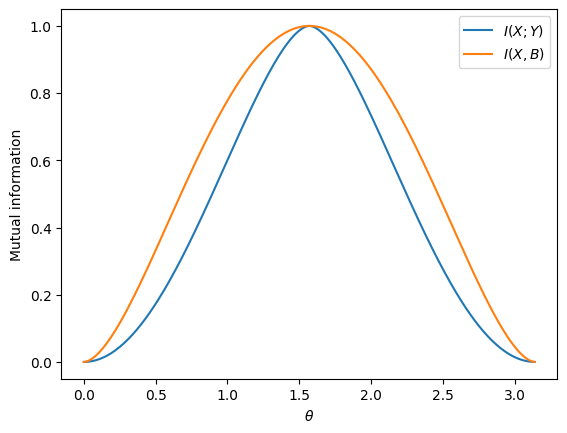

In [4]:
angles = np.arange(0, np.pi, 0.01)
mutual_info_xy_1 = [I_xy_1(angle) for angle in angles]
mutual_info_xb_1 = [I_xb_1(angle) for angle in angles]


plt.plot(angles, mutual_info_xy_1, label=r"$I(X;Y)$")
plt.plot(angles, mutual_info_xb_1, label=r"$I(X,B)$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"Mutual information")
plt.legend()
plt.show()

# Exercise 2

In [5]:
def state0(theta: float) -> np.ndarray:
    """Generates the 3-partite state vector |theta_0>⊗|theta_0>⊗|theta_0>.

    Args:
        theta (float): The parameter used to generate the theta0 state.

    Returns:
        np.ndarray: The resulting quantum state vector.
    """
    out = np.kron(theta0(theta), theta0(theta))
    out = np.kron(out, theta0(theta))
    return out


def state1(theta: float) -> np.ndarray:
    """Generates the 3-partite state vector |theta_0>⊗|theta_1>⊗|theta_1>.

    Args:
        theta (float): The parameter used to generate the theta_0 and theta_1 states.

    Returns:
        np.ndarray: The resulting quantum state vector.
    """
    out = np.kron(theta0(theta), theta1(theta))
    out = np.kron(out, theta1(theta))
    return out


def state2(theta: float) -> np.ndarray:
    """Generates the 3-partite state vector |theta_1>⊗|theta_0>⊗|theta_1>.

    Args:
        theta (float): The parameter used to generate the theta_0 and theta_1 states.

    Returns:
        np.ndarray: The resulting quantum state vector.
    """
    out = np.kron(theta1(theta), theta0(theta))
    out = np.kron(out, theta1(theta))
    return out


def state3(theta: float) -> np.ndarray:
    """Generates the 3-partite state vector |theta_1>⊗|theta_1>⊗|theta_0>.

    Args:
        theta (float): The angle used to generate the theta_0 and theta_1 states.

    Returns:
        np.ndarray: The resulting quantum state vector.
    """
    out = np.kron(theta1(theta), theta1(theta))
    out = np.kron(out, theta0(theta))
    return out


def states(theta: float) -> np.ndarray:
    """Generate an the array of states {|phi_i>_B3} based on the input angle theta.

    Args:
        theta (float): The angle used to generate the theta_0 and theta_1 states.

    Returns:
        np.ndarray: An array containing the states calculated from the input angle.
    """

    return np.array([state0(theta), state1(theta), state2(theta), state3(theta)])


def rho_B3(theta) -> np.ndarray:
    """Compute the density matrix rho_b3 according to X's uniform distribution.

    Args:
        theta (float): The angle used to generate the theta_0 and theta_1 states.

    Returns:
        np.ndarray: The resulting density matrix
    """

    return 0.25 * sum([np.outer(state, state) for state in states(theta)])


def povm(y: int, theta: float) -> np.ndarray:
    """Computes the POVM from the given definition rho^{-1/2}*|phi_y><phi_y|*rho^{-1/2}

    Args:
        y (int): Which of the y values to use.
        theta (float): The angle used to generate the theta_0 and theta_1 states.

    Returns:
        np.ndarray: The POVM's matrix representation.
    """
    rho_b3_invsqrt = sp.linalg.pinv(rho_B3(theta)) * sp.linalg.fractional_matrix_power(rho_B3(theta), 0.5)
    return 0.25 * rho_b3_invsqrt @ np.outer(states(theta)[y], states(theta)[y]) @ rho_b3_invsqrt

In [6]:
def ent_y_2(theta: float) -> float:
    """Calculates the entropy of the Y variable

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The entropy of the Y variable
    """
    h = 0.0
    st = states(theta=theta)

    for y in range(4):
        py = 0.0
        for x in range(4):
            py += 0.25 * p_ycondx(st[x], povm(y, theta))
        h += py * np.log2(py)

    return -h


def ent_xy_2(theta: float) -> float:
    """Calculates the joint entropy of the X and Y variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The joint entropy of the X,Y variables
    """
    h = 0.0
    st = states(theta=theta)

    for y in range(4):
        for x in range(4):
            joint_p = 0.25 * p_ycondx(st[x], povm(y, theta))
            h += joint_p * np.log2(joint_p)

    return -h


def I_xy_2(theta: float) -> float:
    """Computes the mutual information between the X and Y variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The mutual information I(X;Y)
    """
    entx = 2.0
    enty = ent_y_2(theta)
    entxy = ent_xy_2(theta)
    return entx + enty - entxy


def I_xb_2(theta: float) -> float:
    """Computes the mutual information between the X and B variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The mutual information I(X;B)_rho
    """
    mat = 0.25 * sum([np.outer(st, st) for st in states(theta)])
    eigvals = np.linalg.eigvals(mat)
    return np.sum([-eig * np.log2(eig) for eig in eigvals if eig > 1e-5])

/home/ptbadia/miniconda3/envs/qiskit_hackathon/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ptbadia/miniconda3/envs/qiskit_hackathon/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


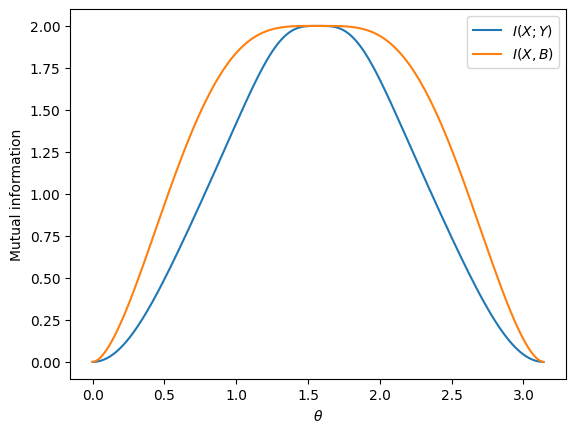

In [7]:
angles = np.arange(0, np.pi, 0.01)
mutual_info_xy_2 = [I_xy_2(angle) for angle in angles]
mutual_info_xb_2 = [I_xb_2(angle) for angle in angles]


plt.plot(angles, mutual_info_xy_2, label=r"$I(X;Y)$")
plt.plot(angles, mutual_info_xb_2, label=r"$I(X,B)$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"Mutual information")
plt.legend()
plt.show()

In [8]:
i3xy_3ixy = [mutual_info_xy_2[i] - 3 * mutual_info_xy_1[i] for i in range(len(mutual_info_xy_1))]
i3xb_3ixb = [mutual_info_xb_2[i] - 3 * mutual_info_xb_1[i] for i in range(len(mutual_info_xb_1))]

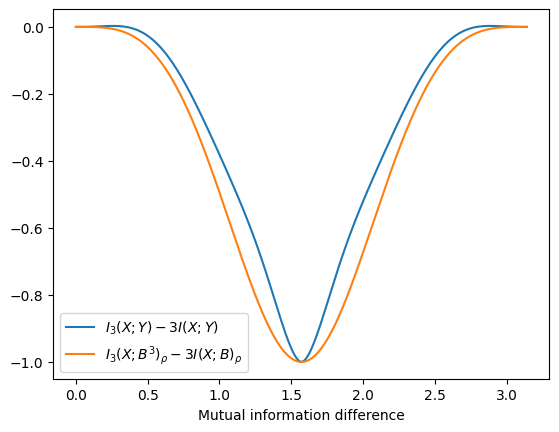

In [10]:
plt.plot(angles, i3xy_3ixy, label=r"$I_3(X;Y) - 3I(X;Y)$")
plt.plot(angles, i3xb_3ixb, label=r"$I_3(X;B^3)_\rho - 3I(X;B)_\rho$")
plt.xlabel(r"$\theta$")
plt.xlabel(r"Mutual information difference")
plt.legend()
plt.show()